In [46]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as pl

In [34]:
class SVM:
    def __init__(self,lr=0.001,lambda_par=0.01,epoch=1000):
        self.lr=lr
        self.lambda_par=lambda_par
        self.epoch=epoch
        self.w=None
        self.b=None
    def fit(self,X,y):
        y_=np.where(y<=0,-1,1)
        n_samples,n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0
        
        for _ in range(self.epoch):
            for index,x_i in enumerate(X):
                condition=y_[index]*(np.dot(x_i,self.w)-self.b)
                if condition >=1:
                    self.w-=self.lr*(2*self.lambda_par*self.w)
                else:
                    self.w-=self.lr*(2*self.lambda_par*self.w-np.dot(x_i,y_[index]))
                    self.b-=self.lr*(y_[index])
    
    def Predict(self,X):
        output=np.dot(X,self.w)-self.b
        return output

In [44]:
X,y=datasets.make_blobs(n_samples=100,n_features=2,centers=2,
                       cluster_std=1.05,random_state=40)
clf=SVM()
clf.fit(X,y)

In [41]:
y=np.where(y==0,-1,1)

In [37]:
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [42]:
clf=SVM()
clf.fit(X,y)

In [43]:
clf.w,clf.b

(array([0.45631604, 0.16243968]), -0.10200000000000008)

[]

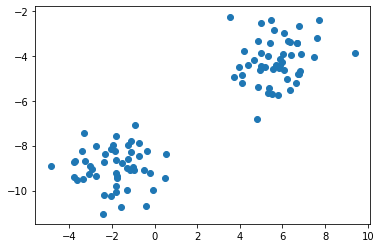

In [52]:
pl.scatter(X[:,0],X[:,1])
pl.plot()